In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
from sci378 import *

In [14]:
import lmfit

In [15]:
data=pd.read_csv('data/linear_data.csv')
data

,Unnamed: 0,x,y
0,0,-5.000000,-12.396990
1,1,-4.655172,-26.185267
2,2,-4.310345,-12.784231
3,3,-3.965517,-6.186905
4,4,-3.620690,-21.905844
5,5,-3.275862,-7.680495
6,6,-2.931034,-19.538526
7,7,-2.586207,-10.300072
8,8,-2.241379,-14.347338
9,9,-1.896552,-9.344688


In [16]:
x=array(data['x'])
y=array(data['y'])
x,y

(array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
        -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
        -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
         0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
         1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
         3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ]),
 array([-12.39698987, -26.1852668 , -12.78423125,  -6.18690469,
        -21.90584415,  -7.6804948 , -19.53852568, -10.30007218,
        -14.34733773,  -9.34468752,  -0.05057071,  -2.79116003,
         -9.87559924,   2.52749643,  -7.51648143,  -6.352439  ,
          2.98929743,  -0.39693121,   4.15207067,  13.19929235,
          1.6593172 ,   3.97302711,  10.50702803,   6.9256665 ,
         10.84885606,   2.67422235,   4.62772486,  13.95807979,
         14.77337995,  12.1113369 ]))

## Fit with lmfit

In [17]:
model=lmfit.models.LinearModel()

In [18]:
results=model.fit(y,x=x)
results

In [25]:
model.independent_vars

['x']

## Retry lmfit with mcmc

In [38]:
def lnlike(data,**kwargs):
    assert len(lmmodel.independent_vars)==1
    
    x,y=data
    independent_vars={lmmodel.independent_vars[0]:x}
    for key in kwargs:
        if key=='_σ':
            continue
        else:
            lmparams[key].value=kwargs[key]
    ys=lmmodel.eval(lmparams,**independent_vars)
    return lognormalpdf(ys-y,0,kwargs['_σ'])

In [39]:
from sci378.stats import *

In [40]:
lmmodel=lmfit.models.LinearModel()
lmparams=lmmodel.make_params()

model=MCMCModel((x,y),lnlike,
                slope=Uniform(-50,50),
                intercept=Uniform(-50,50),
                _σ=Jeffreys(),  # need to define this even though it isn't in your function
               )

Sampling Prior...
Done.
0.38 s
Running MCMC 1/3...
Done.
3.09 s
Running MCMC 2/3...
Done.
3.21 s
Running MCMC 3/3...
Done.
3.13 s


<Figure size 432x288 with 0 Axes>

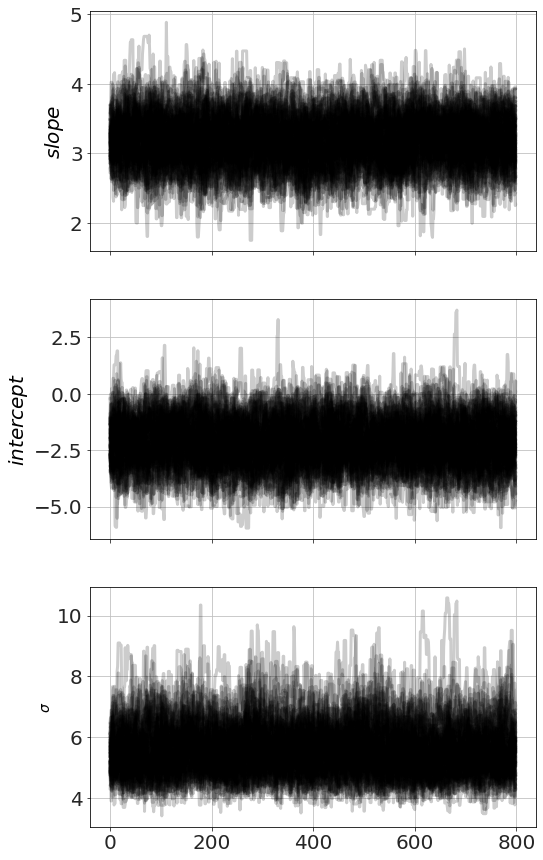

In [41]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

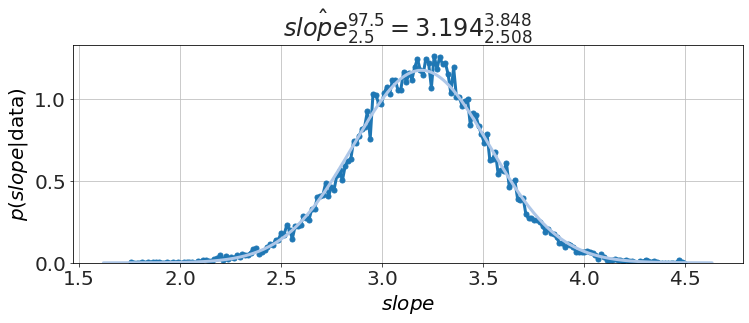

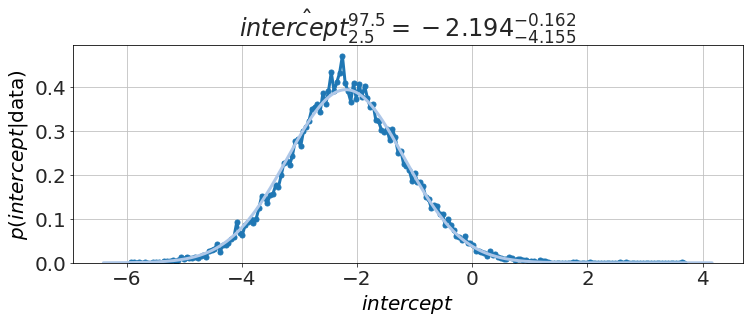

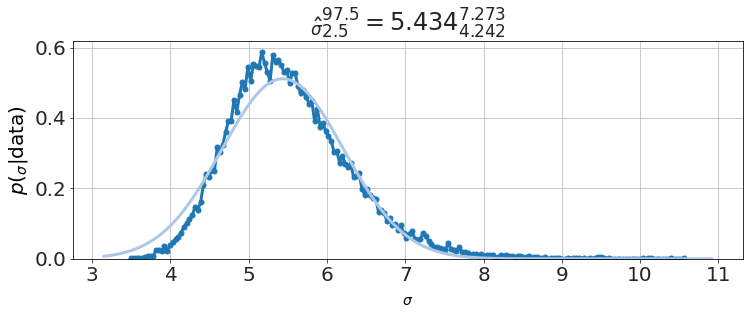

In [42]:
model.plot_distributions()

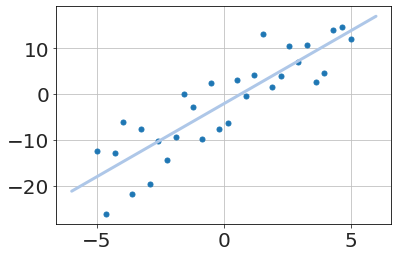

In [43]:
plot(x,y,'o')

x_fake=linspace(-6,6,20)
y_fake=results.eval(x=x_fake)
plot(x_fake,y_fake,'-')

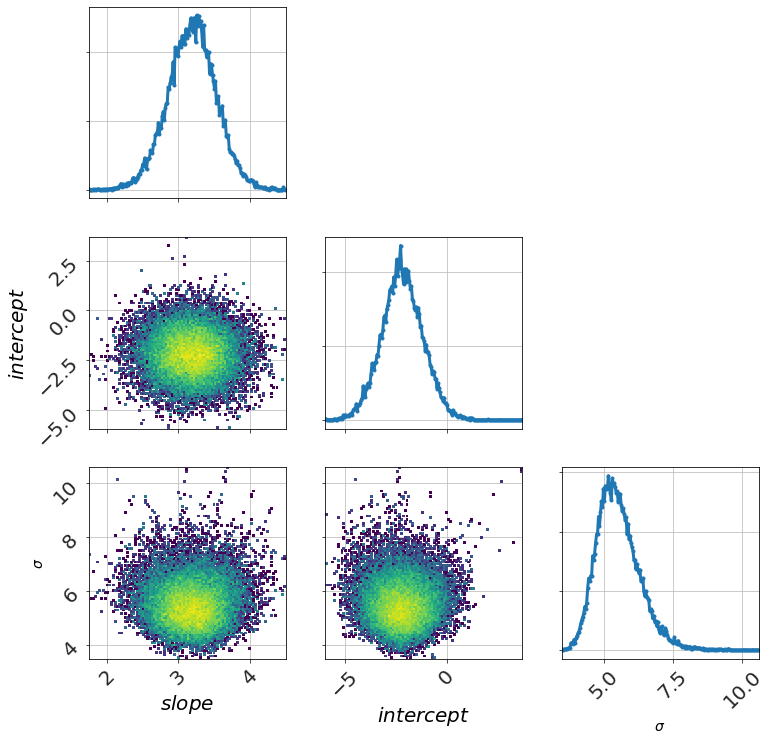

In [44]:
model.triangle_plot()

## What if I do a custom function, and it uses $t$ as a variable?

In [45]:
t=array(data['x'])
V=array(data['y'])
t,V

(array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
        -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
        -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
         0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
         1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
         3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ]),
 array([-12.39698987, -26.1852668 , -12.78423125,  -6.18690469,
        -21.90584415,  -7.6804948 , -19.53852568, -10.30007218,
        -14.34733773,  -9.34468752,  -0.05057071,  -2.79116003,
         -9.87559924,   2.52749643,  -7.51648143,  -6.352439  ,
          2.98929743,  -0.39693121,   4.15207067,  13.19929235,
          1.6593172 ,   3.97302711,  10.50702803,   6.9256665 ,
         10.84885606,   2.67422235,   4.62772486,  13.95807979,
         14.77337995,  12.1113369 ]))

In [47]:
def my_function(t,a=1,b=1,c=1):
    return a*t**2 + b*t + c

In [50]:
model=lmfit.Model(my_function)

In [51]:
results=model.fit(V,t=t)
results

In [52]:
lmmodel=lmfit.Model(my_function)
lmparams=lmmodel.make_params()

model=MCMCModel((t,V),lnlike,
                a=Uniform(-50,50),
                b=Uniform(-50,50),
                c=Uniform(-50,50),
                _σ=Jeffreys(),  # need to define this even though it isn't in your function
               )

Sampling Prior...
Done.
0.42 s
Running MCMC 1/3...
Done.
3.36 s
Running MCMC 2/3...
Done.
3.37 s
Running MCMC 3/3...
Done.
3.44 s


<Figure size 432x288 with 0 Axes>

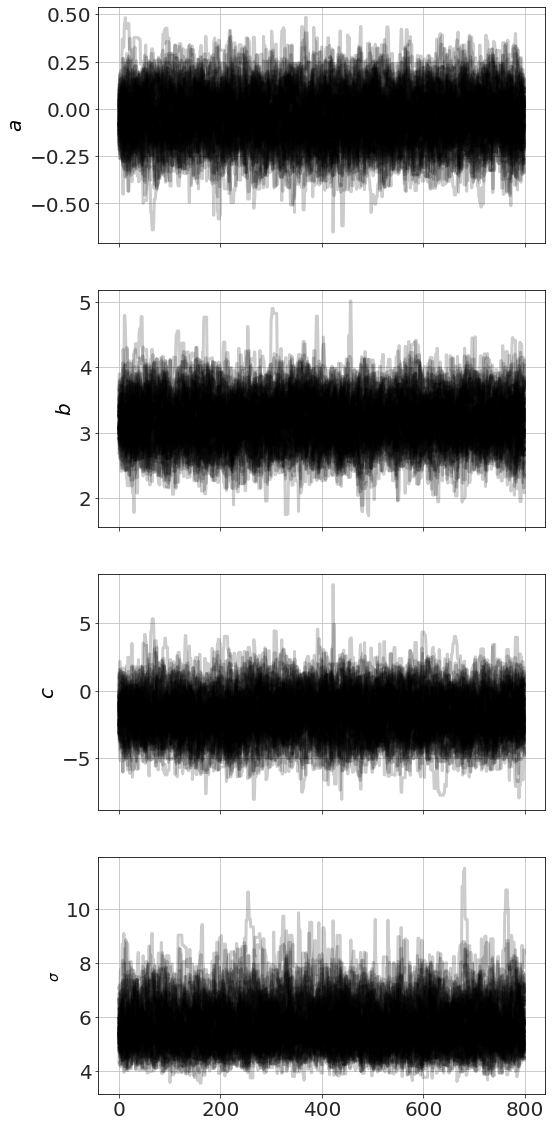

In [53]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

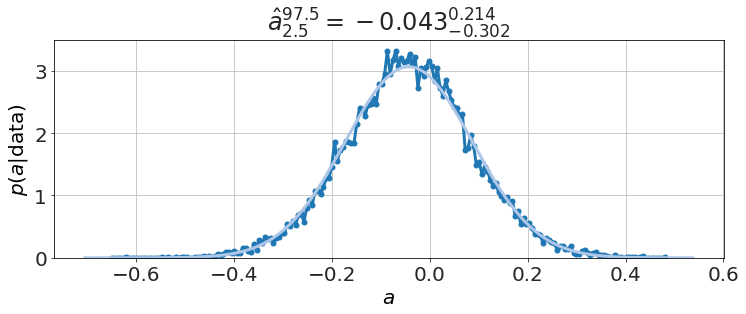

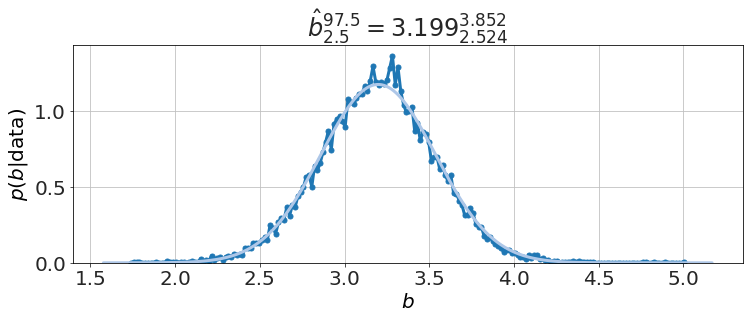

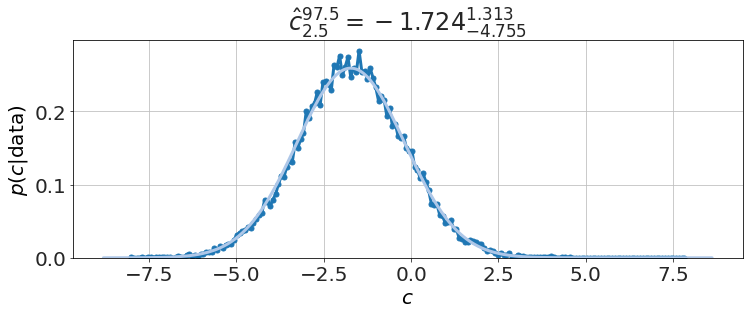

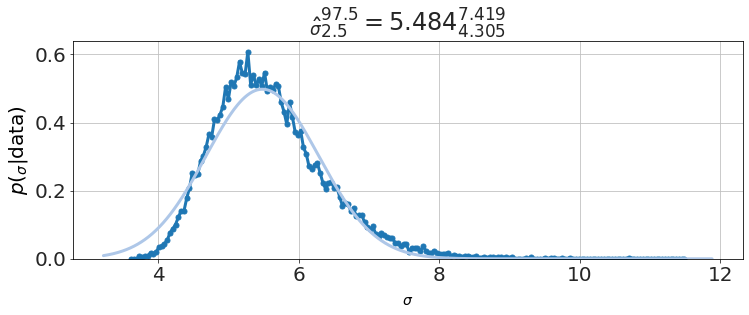

In [54]:
model.plot_distributions()

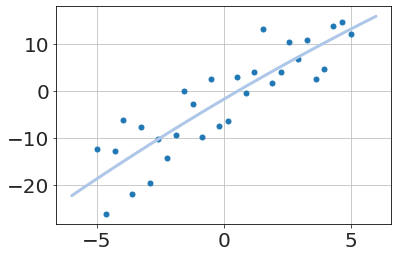

In [56]:
plot(t,V,'o')

t_fake=linspace(-6,6,20)
V_fake=results.eval(t=t_fake)
plot(t_fake,V_fake,'-')

In [ ]:
plot(t,V,'o')

t_fake=linspace(-6,6,20)
V_fake=results.eval(t=t_fake)
plot(t_fake,V_fake,'-')

## still to do - get the functions to show the best-fit curves (95% levels) from mcmc